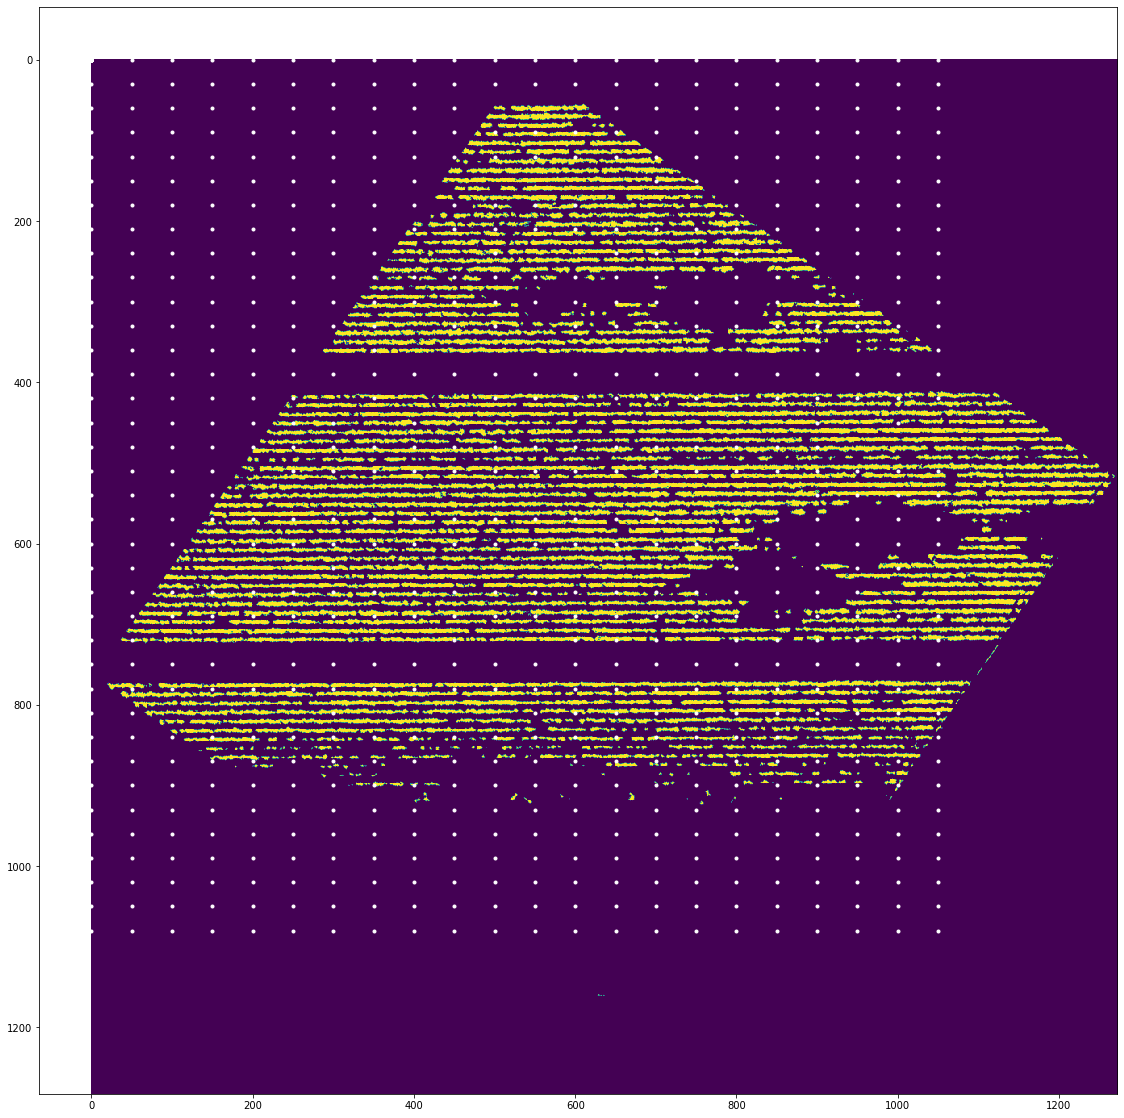

In [73]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
%matplotlib inline

image=cv2.imread('cropped.jpg',0)
frame=cv2.imread('cropped.jpg')
    
# Transform to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
# Apply Filter to detect the blue side panels of the gates
lower_red = np.array([62,0,47])
upper_red = np.array([91,255,208])
    
mask = cv2.inRange(hsv, lower_red, upper_red)
res = cv2.bitwise_and(frame,frame, mask= mask)
    
    
    
    
edges = cv2.Canny(mask,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)

for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(image,(x1,y1),(x2,y2),(0,0,255),2)

h, w = mask.shape  # find width and height of the image
 

mat=mask;
height=h
width=w
image_center = (width/2, height/2) # getRotationMatrix2D needs coordinates in reverse order (width, height) compared to shape

rotation_mat = cv2.getRotationMatrix2D(image_center, 90+theta*(180/math.pi), 1.)

    # rotation calculates the cos and sin, taking absolutes of those.
abs_cos = abs(rotation_mat[0,0]) 
abs_sin = abs(rotation_mat[0,1])

    # find the new width and height bounds
bound_w = int(height * abs_sin + width * abs_cos)
bound_h = int(height * abs_cos + width * abs_sin)

    # subtract old image center (bringing image back to origo) and adding the new image center coordinates
rotation_mat[0, 2] += bound_w/2 - image_center[0]
rotation_mat[1, 2] += bound_h/2 - image_center[1]

    # rotate image with the new bounds and translated rotation matrix
rotated_mat = cv2.warpAffine(mat, rotation_mat, (bound_w, bound_h))
img=rotated_mat


h, w = img.shape
xx=0;
yy=0;

do=np.zeros((5000, 2))
#print(do)

n=int(0);
#print(type(do))

colors = (0,0,0)
area = np.pi*3
for xx in range(0,w-200, 50):
    for yy in range(0,h-200, 30):
        if img[yy,xx]< 200:
            
            do[n,:]=[xx, yy];
            n=n+1
            
#             print (xx)
#             print (yy)
    
#print (do)
# do = np.argwhere(do);
plt.figure(figsize=(40,20))
imgplot = plt.imshow(img);
plt.scatter(do[:,0], do[:,1], marker = '.', color = 'w')
#plt.title('Scatter plot')
#plt.xlabel('X')
#plt.ylabel('Y')
plt.show()
#plt.scatter(do[:,0], do[:,1], s=area, c=colors, alpha=0.5)
#cv2.imshow('mask', img)
#cv2.waitKey()
#img=mpimg.imread('your_image.png')



In [64]:
do

array([[ 0.,  0.],
       [ 0., 10.],
       [ 0., 20.],
       ...,
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [57]:
x = range(3, 20, 2)
for i in x:
    print(i)

3
5
7
9
11
13
15
17
19


In [58]:
w

1279

In [59]:
h

1287